In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')


In [2]:
df = pd.read_csv('fraudTrain.csv')


In [3]:
print('Dataset Shape: ', df.shape)
df.sample(5)

Dataset Shape:  (1296675, 23)


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
1092381,1092381,2020-03-30 09:21:48,30263540414123,fraud_Berge LLC,gas_transport,48.82,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,8eb2787da18017d7b885c2505faf6997,1364635308,38.155367,-112.928666,0
53296,53296,2019-02-01 14:33:17,180042946491150,"fraud_Conroy, Balistreri and Gorczany",health_fitness,42.63,Charles,Robles,M,3337 Lisa Divide,...,27.7898,-82.7243,341043,"Engineer, land",1989-02-28,db5c95a233a1d84b62d3d65213b8f410,1328106797,27.329459,-83.381932,0
647593,647593,2019-10-02 21:11:07,4742883543039288059,"fraud_Gottlieb, Considine and Schultz",shopping_net,3.60,Cassandra,Sanders,F,78117 George Mountains,...,20.0271,-155.3697,1490,"Scientist, research (maths)",1991-04-13,2ff7143cc617f36c93d3d1e77345655e,1349212267,19.925186,-154.447398,0
297403,297403,2019-05-25 22:25:27,4424338559877976,"fraud_Douglas, DuBuque and McKenzie",travel,4.99,Denise,Barnett,F,23220 Eaton Harbors,...,40.8130,-83.4196,118,Private music teacher,1957-11-12,0232ff8d2e7a7a6a06e5d62ed862b8c6,1337984727,41.296914,-83.083528,0
1080855,1080855,2020-03-24 17:06:28,4681601008538160,fraud_Turner and Sons,shopping_pos,3.23,Tammy,Davis,F,77663 Colleen Freeway,...,39.9148,-80.7310,16183,Physiotherapist,1977-08-12,5a78ceb03fae330b1c349ce03ae83949,1364144788,39.900645,-80.422502,0


In [4]:
print("Data Info: ")
df.info()

Data Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long  

In [5]:
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [6]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [7]:
print(df['is_fraud'].value_counts())

is_fraud
0    1289169
1       7506
Name: count, dtype: int64


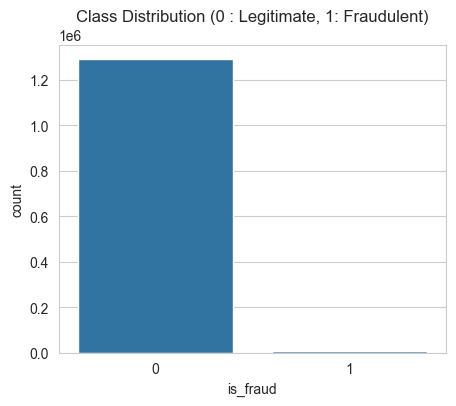

In [8]:
plt.figure(figsize=(5,4))
sns.countplot(x='is_fraud', data =df)
plt.title('Class Distribution (0 : Legitimate, 1: Fraudulent)')
plt.show()

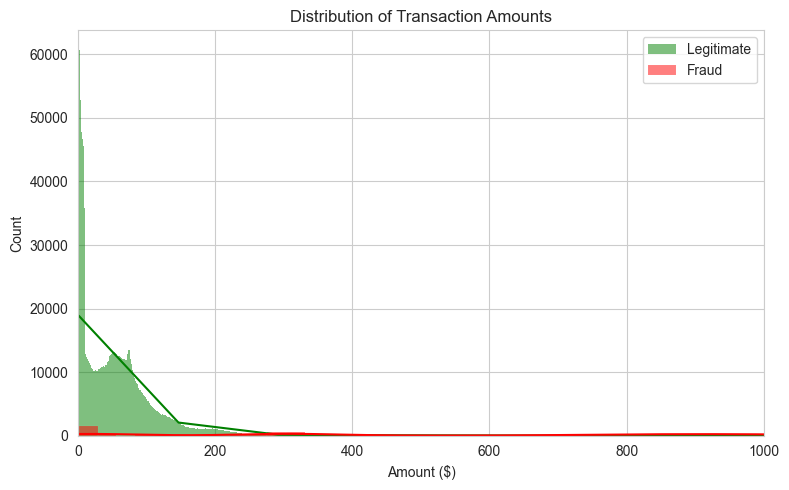

In [9]:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.histplot(df[df['is_fraud']==0]['amt'], kde=True, color='green', label='Legitimate')
sns.histplot(df[df['is_fraud']==1]['amt'], bins=50, kde=True, color='red', label='Fraud')
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount ($)')
plt.ylabel('Count')
plt.legend()
plt.xlim(0,1000)
plt.tight_layout()
# plt.yscale('log')
plt.show()

In [10]:
df_ml = df.copy()

df_ml['trans_date_trans_time'] = pd.to_datetime(df_ml['trans_date_trans_time'])
df_ml['trans_hour'] = df_ml['trans_date_trans_time'].dt.hour
df_ml['trans_day'] = df_ml['trans_date_trans_time'].dt.day
df_ml['trans_month'] = df_ml['trans_date_trans_time'].dt.month
df_ml['trans_dayofweek'] = df_ml['trans_date_trans_time'].dt.dayofweek

df_ml['dob'] = pd.to_datetime(df_ml['dob'])
df_ml['age'] = (pd.to_datetime('2021-01-01') - df_ml['dob']).dt.days//365
# Select features for the model
# We'll choose a mix of numerical and categorical featuers that might be important
features = [
    'amt', 'trans_hour', 'trans_day', 'trans_month', 'trans_dayofweek', 'age',
    'city_pop', 'merchant', 'category', 'gender', 'state'
]
target = 'is_fraud'

X= df_ml[features]
y= df_ml[target]
print('Selected Features:')
print(X.dtypes)
print(f"\nFeature matrix shape: {X.shape}")

Selected Features:
amt                float64
trans_hour           int32
trans_day            int32
trans_month          int32
trans_dayofweek      int32
age                  int64
city_pop             int64
merchant            object
category            object
gender              object
state               object
dtype: object

Feature matrix shape: (1296675, 11)


In [11]:
# Identify categorical columns
categorical_cols = X.select_dtypes(include = ['object']).columns.tolist()
print(f"Categorical columns to  encode: {categorical_cols}")
X_encoded = pd.get_dummies(X, columns= categorical_cols, drop_first=True)
print(f"\nEncoded feature matrix shape: {X_encoded.shape}")
X_encoded.head()

Categorical columns to  encode: ['merchant', 'category', 'gender', 'state']

Encoded feature matrix shape: (1296675, 763)


,amt,trans_hour,trans_day,trans_month,trans_dayofweek,age,city_pop,merchant_fraud_Abbott-Steuber,merchant_fraud_Abernathy and Sons,merchant_fraud_Abshire PLC,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,4.97,0,1,1,1,32,3495,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,107.23,0,1,1,1,42,149,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,220.11,0,1,1,1,58,4154,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,45.00,0,1,1,1,54,1939,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,41.96,0,1,1,1,34,99,False,False,False,...,False,False,False,False,True,False,False,False,False,False


# Split Data into Training and Testing  sets

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state = 42, stratify=y
)
print(f"Training set size: {X_train.shape}")
print(f"Training set size: {X_test.shape}")
print(f"\nTraining set target distribution: \n {y_train.value_counts(normalize= True)}")

Training set size: (1037340, 763)
Training set size: (259335, 763)

Training set target distribution: 
 is_fraud
0    0.994211
1    0.005789
Name: proportion, dtype: float64


In [13]:
# identify numerical feature to scale
numerical_to_scale= ['amt', 'city_pop', 'age']
scaler_features = [col for col in X_encoded.columns if any(num in col for num in numerical_to_scale)]
scaler = StandardScaler()
# Fit the scaler on the training data and transform both train and test sets
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[scaler_features] = scaler.fit_transform(X_train[scaler_features])
X_test_scaled[scaler_features] = scaler.transform(X_test[scaler_features])
print('done')

done


# Handle class Imbalance

In [14]:
# Using class_weight = 'balanced' in the model.
# create a function to train, predict, and evaluate models
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy: .4f}")
    print(f"Precision: {precision: .4f}")
    print(f"Recall: {recall: .4f}")
    print(f"F1-score: {f1: .4f}")
    print(f"ROC-AUC: {roc_auc: .4f}")
    print("\nClassification Report: ")
    print(classification_report(y_test, y_pred, target_names=['Legitimate', 'Fraud']))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
               xticklabels= ['Legitimate', 'Fraud'],
               yticklabels=['Legitimate', 'Fraud'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    return {'Model': model_name, 'Accuracy':accuracy, 'Precision': precision, 'Recall':recall, 'F1-Score':f1, 'ROC-AUC':roc_auc}

Model: Logistic Regression
Accuracy:  0.8765
Precision:  0.0354
Recall:  0.7748
F1-score:  0.0677
ROC-AUC:  0.9072

Classification Report: 
              precision    recall  f1-score   support

  Legitimate       1.00      0.88      0.93    257834
       Fraud       0.04      0.77      0.07      1501

    accuracy                           0.88    259335
   macro avg       0.52      0.83      0.50    259335
weighted avg       0.99      0.88      0.93    259335



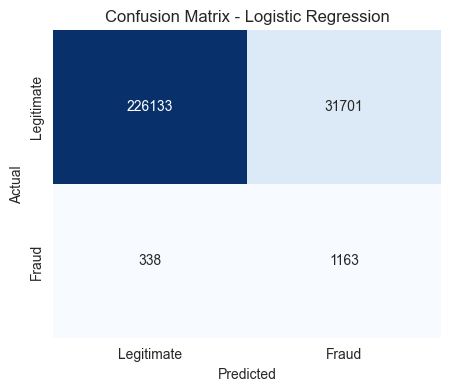

In [15]:
#  Logistic Regression
lr_model = LogisticRegression(class_weight = 'balanced', random_state=42, max_iter= 1000)
lr_results  = evaluate_model(lr_model, X_train_scaled, y_train, X_test_scaled, y_test, 'Logistic Regression')

Model: Decision Tree (max_depth= 10)
Accuracy:  0.9635
Precision:  0.1351
Recall:  0.9820
F1-score:  0.2375
ROC-AUC:  0.9807

Classification Report: 
              precision    recall  f1-score   support

  Legitimate       1.00      0.96      0.98    257834
       Fraud       0.14      0.98      0.24      1501

    accuracy                           0.96    259335
   macro avg       0.57      0.97      0.61    259335
weighted avg       0.99      0.96      0.98    259335



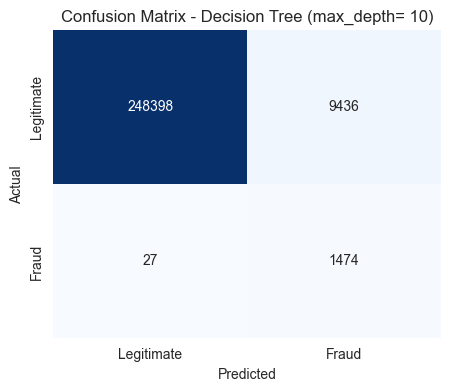

In [16]:
#  Decision Tree
dt_model = DecisionTreeClassifier(class_weight='balanced', random_state=42, max_depth=10)
dt_results = evaluate_model(dt_model, X_train_scaled, y_train, X_test_scaled, y_test, "Decision Tree (max_depth= 10)")

Model: Random Forest
Accuracy:  0.9700
Precision:  0.1388
Recall:  0.8041
F1-score:  0.2367
ROC-AUC:  0.9704

Classification Report: 
              precision    recall  f1-score   support

  Legitimate       1.00      0.97      0.98    257834
       Fraud       0.14      0.80      0.24      1501

    accuracy                           0.97    259335
   macro avg       0.57      0.89      0.61    259335
weighted avg       0.99      0.97      0.98    259335



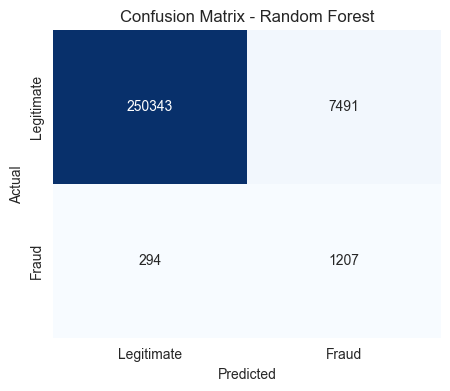

In [17]:
#  Random Forest 
rf_model = RandomForestClassifier(class_weight = 'balanced', random_state= 42, n_estimators =100, max_depth=15, n_jobs= -1)
rf_results = evaluate_model(rf_model, X_train_scaled, y_train, X_test_scaled, y_test, "Random Forest")

In [18]:
result_df = pd.DataFrame([lr_results, dt_results, rf_results])
print("\nModel Performance Comparision:")
result_df.set_index('Model', inplace=True)
result_df



Model Performance Comparision:


,Accuracy,Precision,Recall,F1-Score,ROC-AUC
Model,,,,,
Logistic Regression,0.876457,0.035388,0.774817,0.067685,0.907237
Decision Tree (max_depth= 10),0.963511,0.135105,0.982012,0.237531,0.980731
Random Forest,0.969981,0.138768,0.804131,0.236690,0.970378


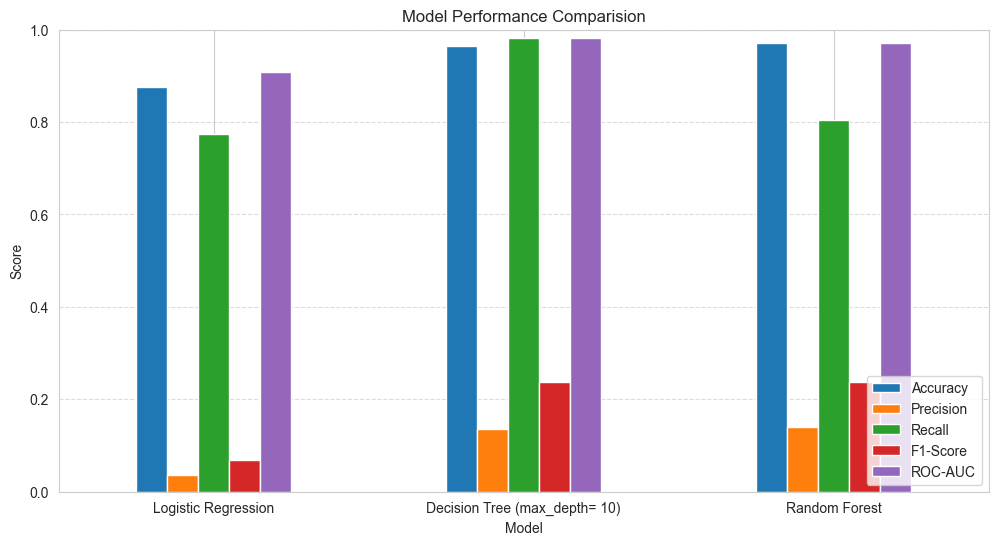

In [19]:
result_df.plot(kind='bar', figsize=(12,6))
plt.title('Model Performance Comparision')
plt.ylabel('Score')
plt.xticks(rotation = 0)
plt.ylim(0,1)
plt.legend(loc = 'lower right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

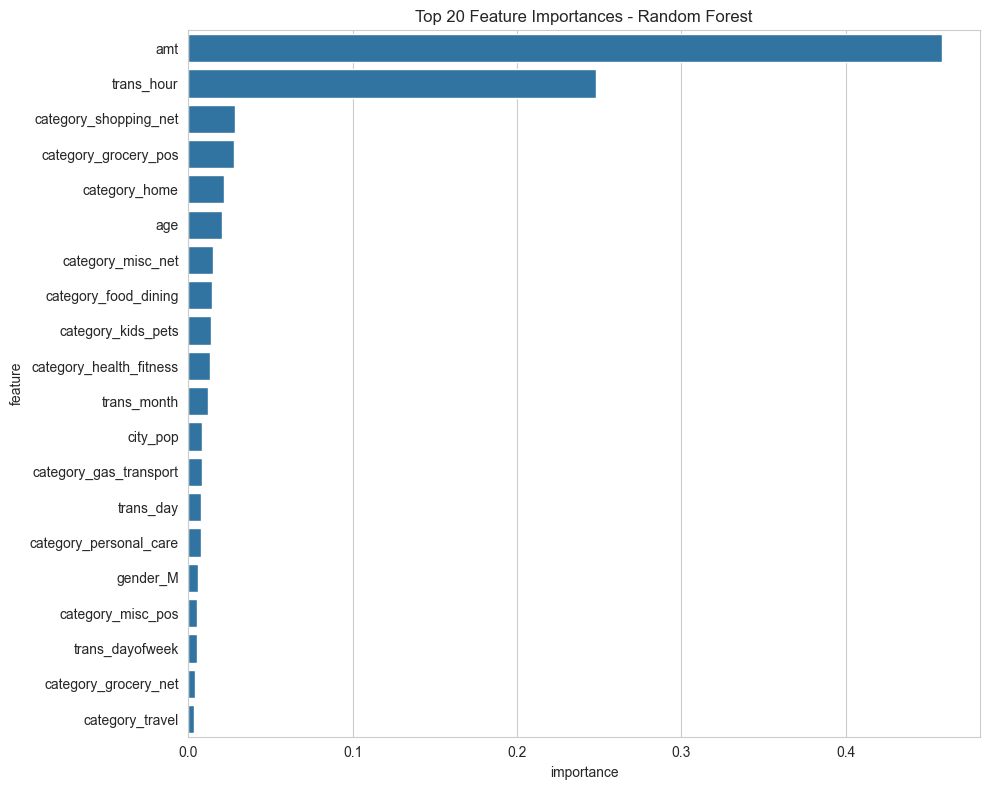

In [20]:
feature_importances = pd.DataFrame({
    'feature': X_train_scaled.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending= False).head(20)
plt.figure(figsize=(10,8))
sns.barplot(x = 'importance', y='feature', data = feature_importances)
plt.title('Top 20 Feature Importances - Random Forest')
plt.tight_layout()
plt.show()

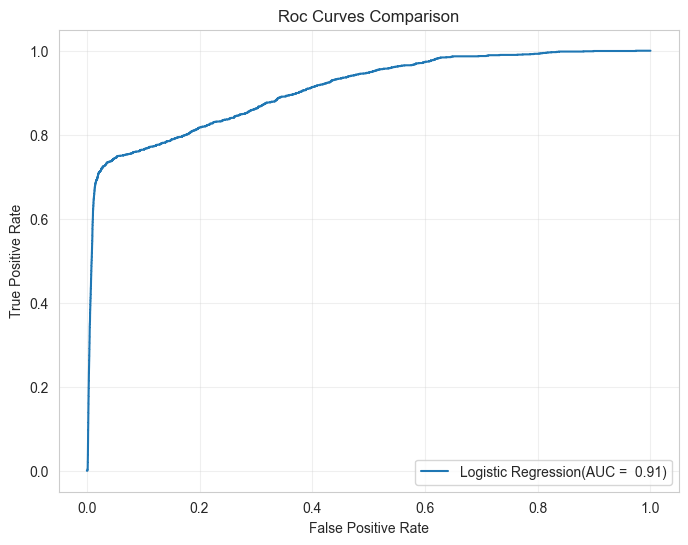

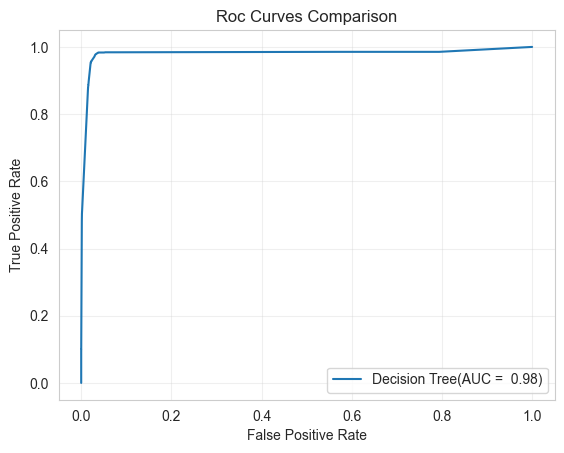

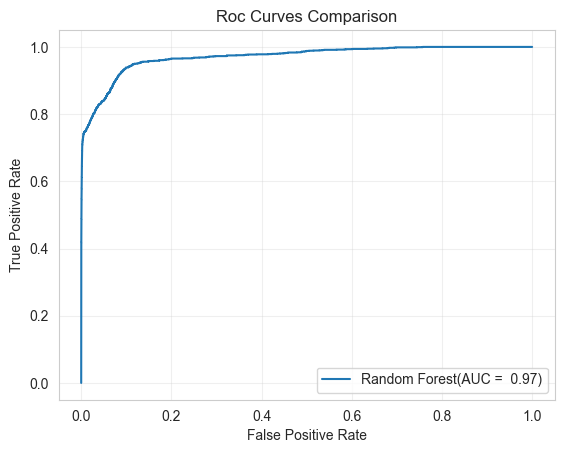

In [21]:
plt.figure(figsize = (8,6))
for model, name in [(lr_model, 'Logistic Regression'), (dt_model, 'Decision Tree'), (rf_model, 'Random Forest')]:
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr,  _ = roc_curve(y_test, y_pred_proba)
    roc_auc= roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label = f'{name}(AUC = {roc_auc: .2f})')
    plt.xlabel("False Positive Rate")
    plt.ylabel('True Positive Rate')
    plt.title('Roc Curves Comparison')
    plt.legend(loc = 'lower right')
    plt.grid(alpha = 0.3)
    plt.show()